<a href="https://www.kaggle.com/code/laxmivatsalyadaita/brest-cancer-patient-survival?scriptVersionId=141209113" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**If you like my notebook, please don't forget to upvote! You can also create a copy of my notbeook and edit to run your additional analysis.**

# Overview

This notebook consists of my analysis for Breast Cancer Patient Survival Prediction.

The dataset is highly imbalanced and has significant number of outliers. I started by checking for missing values. Since it is a medical dataset, I didn't want to assume the survival of a person and build a classifier based on such an assumption, Hence, I dropped the observations that had the "Patient Survival" missing. I also dropped the "Date of Surgery" and "Date of Last Visit" features.

Other redundant features "ER Status" and "PR Status". These features do not provide any information to the classifier as they contain the same value for all the observations. 

The feature "Gender" consisted of 4 MALE samples which act as outliers to our model. Therefore, instead of dropping those observations, I dropped the "Gender" feature and based the analysis on other features such as age, protein levels, tumor stage, HER2 status and type of surgery.

The dataset is highly imbalanced and hence the SMOTE technique was performed to oversample the data before proceeding to train the various models.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv


In [2]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Raw Data

In [3]:
raw_data = pd.read_csv('/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv')
raw_data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [4]:
raw_data.columns.values

array(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery',
       'Date_of_Last_Visit', 'Patient_Status'], dtype=object)

# Null Value Handling

Before performing any processing on the raw data, let's make a copy into data.

In [5]:
data = raw_data.copy()

In [6]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [7]:
data.shape

(334, 15)

**Check for Null Values**

In [8]:
data.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

dropping date_or_surgery and date_of_last_visit

In [9]:
data = data.drop(['Date_of_Surgery','Date_of_Last_Visit'], axis=1)
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive


Dropping the observations with null values.

In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.shape

(321, 13)

# Exploratory Data Analysis

**EDA of categorical features and removal of redundant features**

<Axes: xlabel='Patient_Status', ylabel='count'>

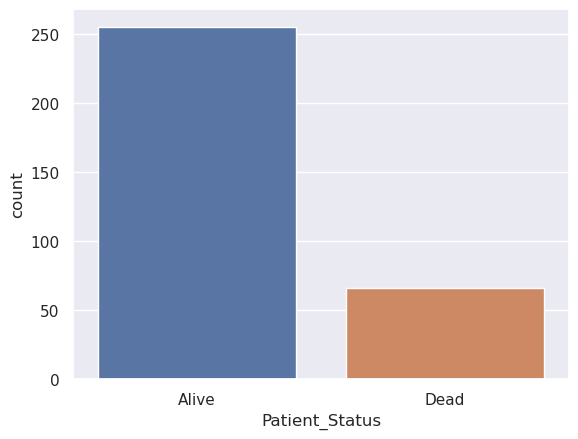

In [12]:
sns.countplot(x='Patient_Status', data=data)

<Axes: xlabel='Gender', ylabel='count'>

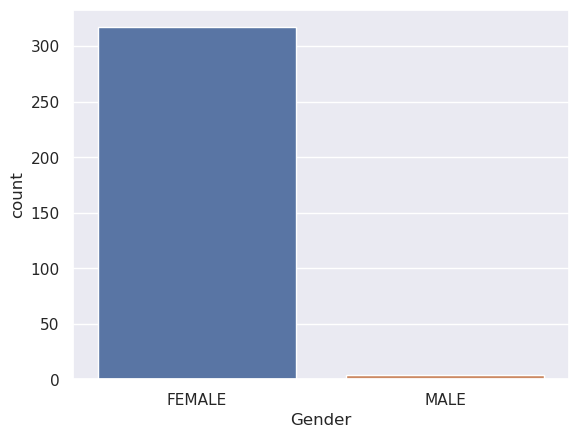

In [13]:
sns.countplot(x='Gender', data=data)

In [14]:
(data['Gender'].value_counts()['MALE'])/data['Gender'].shape[0]

0.012461059190031152

The 'Gender' feature looks extremely imbalanced. The few MALE observations would act as outliers to our dataset. However, on dropping the MALE observations, it would mean that our dataset consist of only FEMALE observations (meaning the feature does not provide any information anymore). Hence, this feature can be dropped. Let's design the model to make the predictions based on other features.

<Axes: xlabel='Tumour_Stage', ylabel='count'>

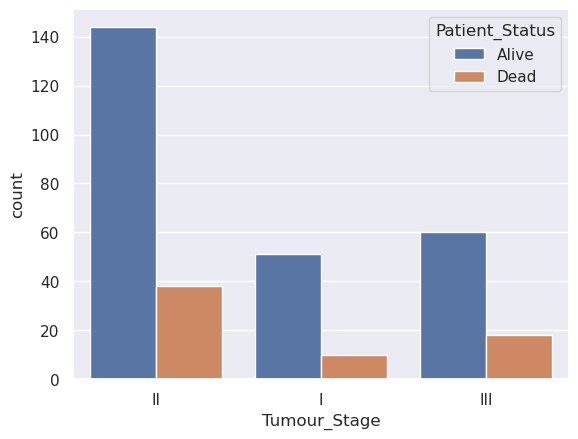

In [15]:
sns.countplot(x='Tumour_Stage', hue='Patient_Status', data=data)

The number of observations with Tumour_Stage II is almost equal to to combined number of observations of Tumour_Stage I and III.

<Axes: xlabel='count', ylabel='Histology'>

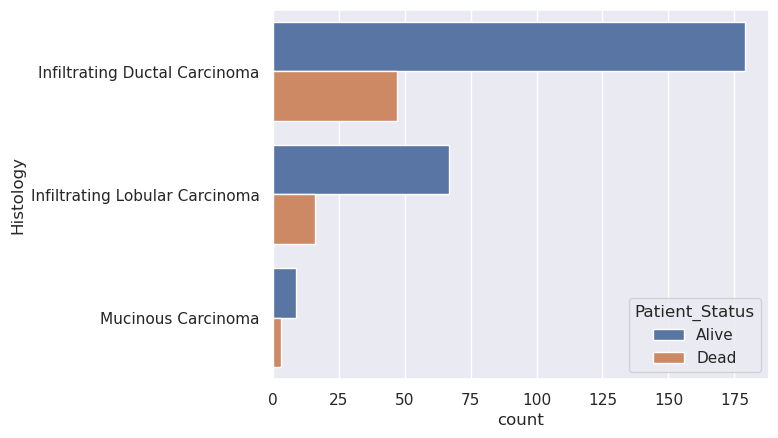

In [16]:
sns.countplot(y='Histology', hue = 'Patient_Status', data=data)

In [17]:
data['ER status'].unique()

array(['Positive'], dtype=object)

In [18]:
data['PR status'].unique()

array(['Positive'], dtype=object)

The 'ER status' and 'PR status' is positive for all observations. Hence, these can be dropped as they do not provide any information.

<Axes: xlabel='HER2 status', ylabel='count'>

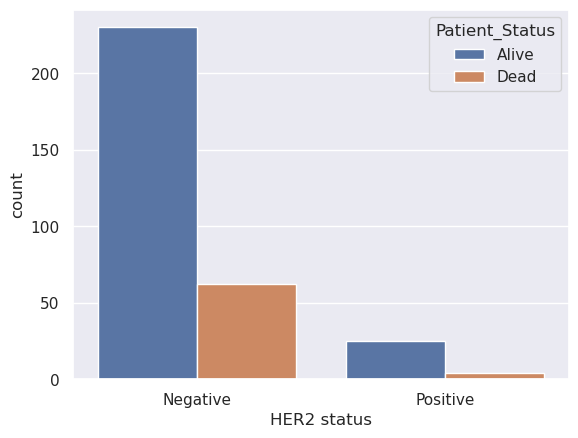

In [19]:
sns.countplot(x='HER2 status', hue='Patient_Status', data=data)

<Axes: xlabel='count', ylabel='Surgery_type'>

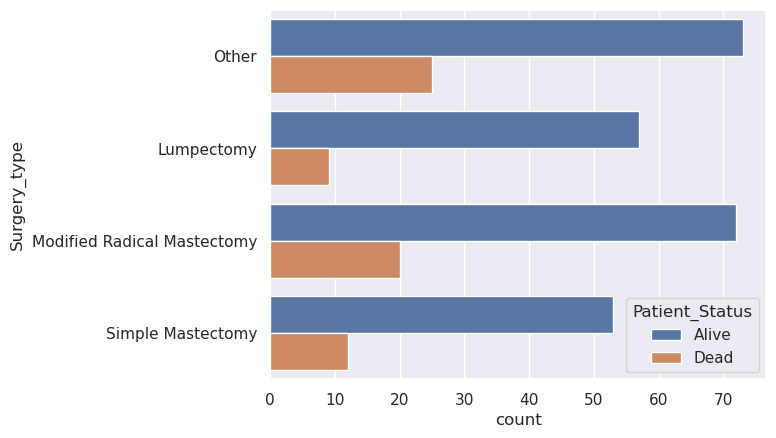

In [20]:
sns.countplot(y='Surgery_type', hue='Patient_Status', data=data)

**EDA of quantitative features and outlier handling:**

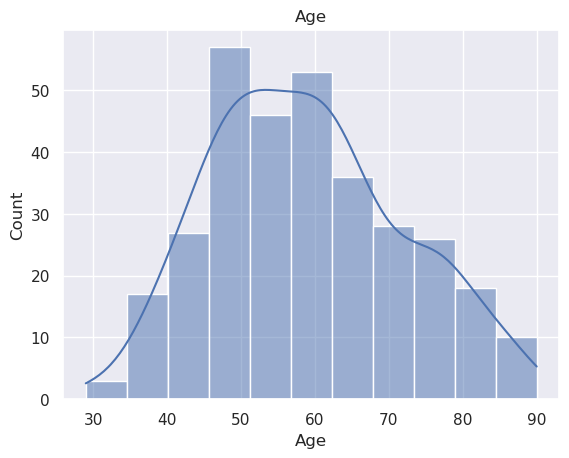

In [21]:
sns.histplot(data, x='Age', kde=True)
plt.title('Age')
plt.show()

<Axes: xlabel='Age', ylabel='Patient_Status'>

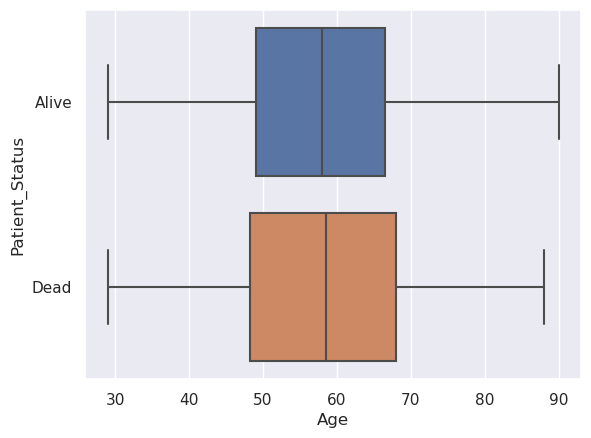

In [22]:
sns.boxplot(x=data['Age'], y=data['Patient_Status'])

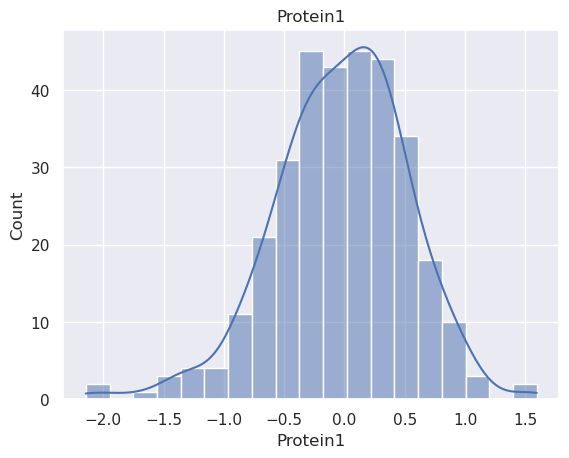

In [23]:
sns.histplot(data, x='Protein1', kde=True)
plt.title('Protein1')
plt.show()

<Axes: xlabel='Protein1'>

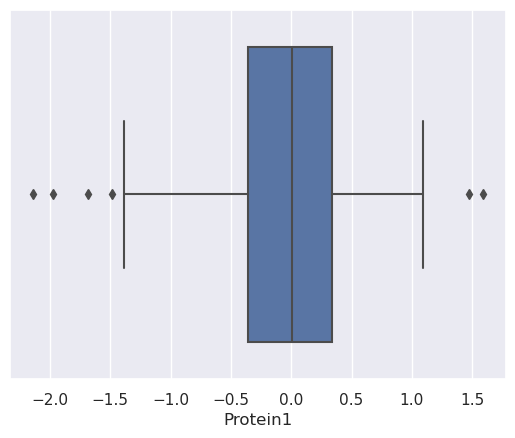

In [24]:
sns.boxplot(x=data['Protein1'])

In [25]:
Q1 = data['Protein1'].quantile(0.25)
Q3 = data['Protein1'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Protein1_outliers = data[(data['Protein1'] < Q1 - whisker_width*IQR) | (data['Protein1'] > Q3 + whisker_width*IQR)]
Protein1_outliers.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
19,61,FEMALE,-1.4872,0.34903,-0.662420,0.18528,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
67,83,FEMALE,-2.1446,-0.17946,-0.200330,-1.48880,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Other,Alive
98,75,FEMALE,-1.9711,-0.63197,0.037134,-0.46685,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
168,52,FEMALE,-1.6828,0.72722,0.056773,-1.24410,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,Alive
191,68,MALE,1.4704,0.46900,0.135540,-0.28984,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive


In [26]:
protein1_mean = data['Protein1'].mean()
protein1_std = data['Protein1'].std()
low= protein1_mean -(3 * protein1_std)
high= protein1_mean + (3 * protein1_std)
protein1_outliers = data[(data['Protein1'] < low) | (data['Protein1'] > high)]
protein1_outliers.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
67,83,FEMALE,-2.1446,-0.17946,-0.200330,-1.48880,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Other,Alive
98,75,FEMALE,-1.9711,-0.63197,0.037134,-0.46685,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
168,52,FEMALE,-1.6828,0.72722,0.056773,-1.24410,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,Alive


Treating outliers in Protein1:

In [27]:
Q1 = data['Protein1'].quantile(0.25)
Q3 = data['Protein1'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Protein1']=np.where(data['Protein1']>upper_whisker,upper_whisker,
                       np.where(data['Protein1']<lower_whisker,lower_whisker,
                                data['Protein1']))

<Axes: xlabel='Protein1'>

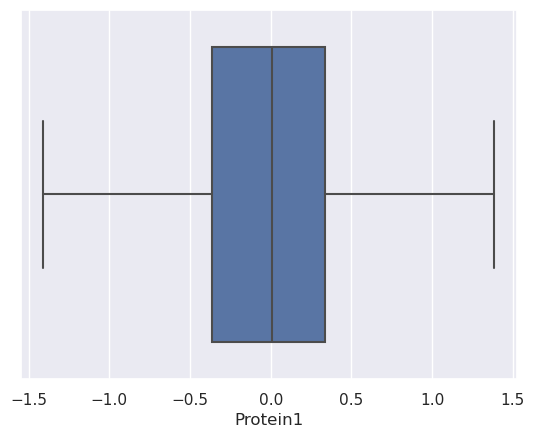

In [28]:
sns.boxplot(x=data['Protein1'])

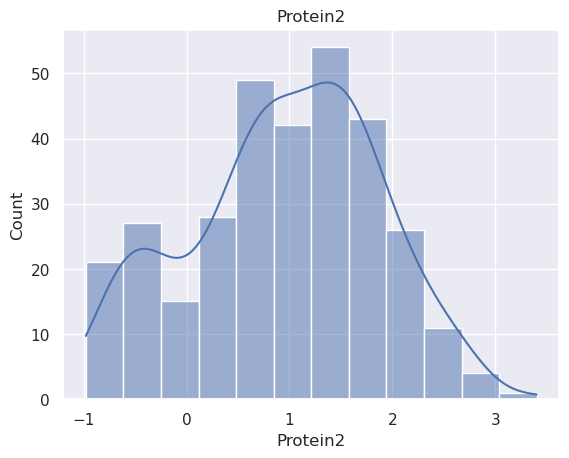

In [29]:
sns.histplot(data, x='Protein2', kde=True)
plt.title('Protein2')
plt.show()

<Axes: xlabel='Protein2'>

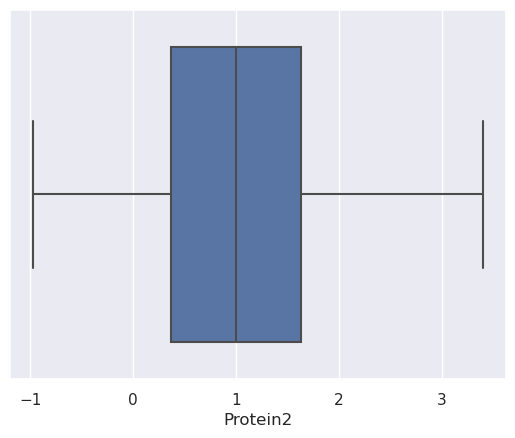

In [30]:
sns.boxplot(x=data['Protein2'])

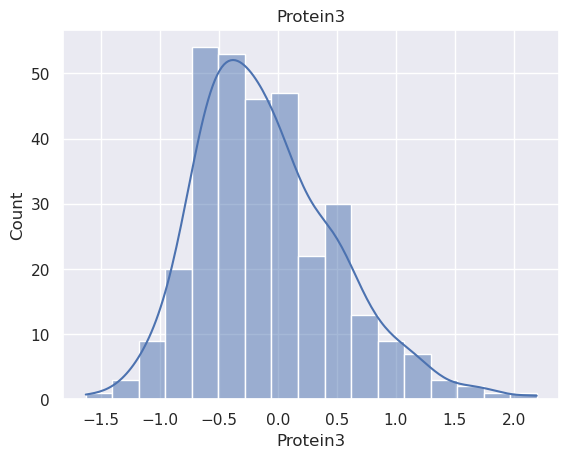

In [31]:
sns.histplot(data, x='Protein3', kde=True)
plt.title('Protein3')
plt.show()

<Axes: xlabel='Protein3'>

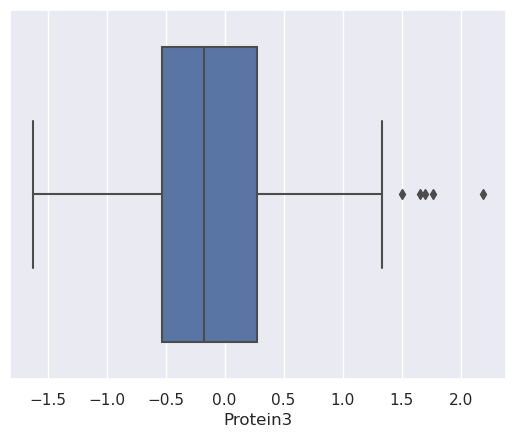

In [32]:
sns.boxplot(x=data['Protein3'])

In [33]:
Q1 = data['Protein3'].quantile(0.25)
Q3 = data['Protein3'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Protein3_outliers = data[(data['Protein3'] < Q1 - whisker_width*IQR) | (data['Protein3'] > Q3 + whisker_width*IQR)]
Protein3_outliers.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
190,54,FEMALE,0.326710,-0.29499,1.7691,0.770870,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
211,51,FEMALE,-0.851870,1.67600,1.7019,-0.078298,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
233,54,FEMALE,0.783210,-0.84140,1.5070,0.816290,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive
236,64,FEMALE,-0.338660,-0.64147,1.6575,-0.420820,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
313,51,FEMALE,0.090487,-0.63873,2.1934,-0.838430,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive


In [34]:
protein3_mean = data['Protein3'].mean()
protein3_std = data['Protein3'].std()
low= protein3_mean -(3 * protein3_std)
high= protein3_mean + (3 * protein3_std)
protein3_outliers = data[(data['Protein3'] < low) | (data['Protein3'] > high)]
protein3_outliers.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
190,54,FEMALE,0.326710,-0.29499,1.7691,0.770870,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
211,51,FEMALE,-0.851870,1.67600,1.7019,-0.078298,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead
313,51,FEMALE,0.090487,-0.63873,2.1934,-0.838430,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive


Treating outliers in Protein3

In [35]:
Q1 = data['Protein3'].quantile(0.25)
Q3 = data['Protein3'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Protein3']=np.where(data['Protein3']>upper_whisker,upper_whisker,
                       np.where(data['Protein3']<lower_whisker,lower_whisker,
                                data['Protein3']))

<Axes: xlabel='Protein3'>

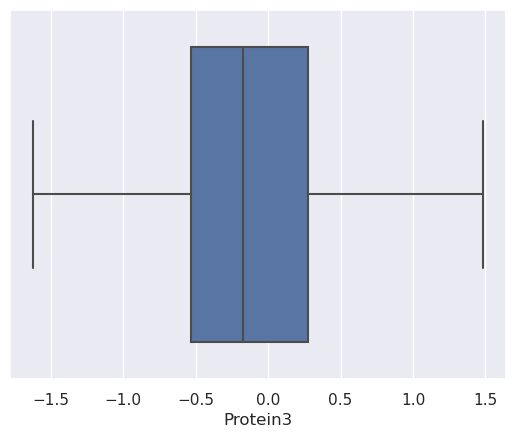

In [36]:
sns.boxplot(x=data['Protein3'])

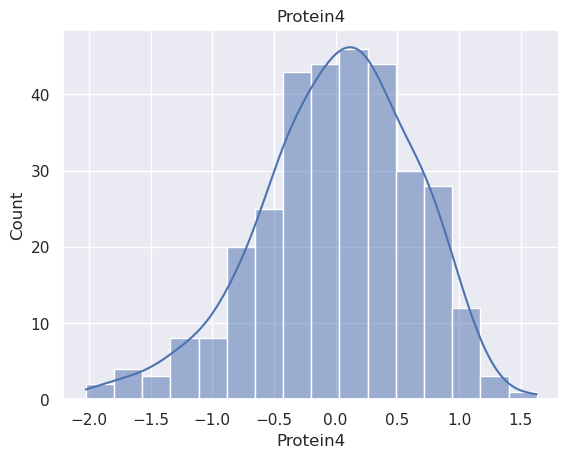

In [37]:
sns.histplot(data, x='Protein4', kde=True)
plt.title('Protein4')
plt.show()

<Axes: xlabel='Protein4'>

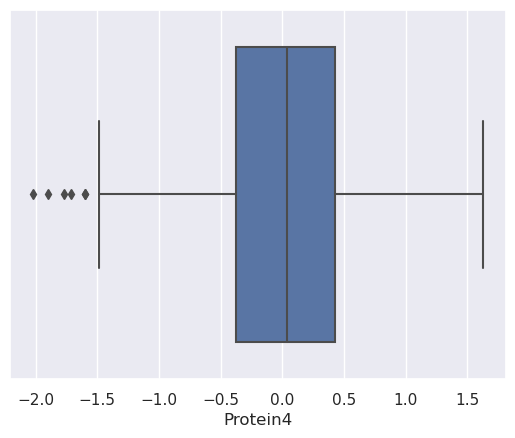

In [38]:
sns.boxplot(x=data['Protein4'])

In [39]:
Q1 = data['Protein4'].quantile(0.25)
Q3 = data['Protein4'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Protein4_outliers = data[(data['Protein4'] < Q1 - whisker_width*IQR) | (data['Protein4'] > Q3 + whisker_width*IQR)]
Protein4_outliers.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
33,56,FEMALE,-0.932560,0.70232,-0.59921,-1.8993,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
89,41,FEMALE,0.064723,0.75941,0.28149,-1.7127,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,Alive
133,51,FEMALE,0.008438,1.40190,0.12160,-2.0255,II,Mucinous Carcinoma,Positive,Positive,Negative,Simple Mastectomy,Alive
184,56,FEMALE,-0.586410,0.22446,-0.30652,-1.5965,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
304,66,FEMALE,0.141290,1.29990,-0.34325,-1.7684,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Dead


In [40]:
protein4_mean = data['Protein4'].mean()
protein4_std = data['Protein4'].std()
low= protein4_mean -(3 * protein4_std)
high= protein4_mean + (3 * protein4_std)
protein4_outliers = data[(data['Protein4'] < low) | (data['Protein4'] > high)]
protein4_outliers.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
33,56,FEMALE,-0.932560,0.70232,-0.59921,-1.8993,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
133,51,FEMALE,0.008438,1.40190,0.12160,-2.0255,II,Mucinous Carcinoma,Positive,Positive,Negative,Simple Mastectomy,Alive


Treating outliers in Protein4:

In [41]:
Q1 = data['Protein4'].quantile(0.25)
Q3 = data['Protein4'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Protein4']=np.where(data['Protein4']>upper_whisker,upper_whisker,
                       np.where(data['Protein4']<lower_whisker,lower_whisker,
                                data['Protein4']))

<Axes: xlabel='Protein4'>

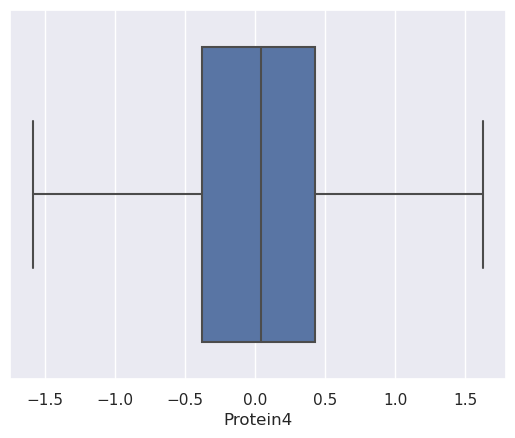

In [42]:
sns.boxplot(x=data['Protein4'])

The data appears to be skewed. There seem to be some outliers in Protein1, Protein3 and Protein4 which have been handled.

The features to be dropped are **Gender**, **ER status** and **PR status**.

# Data Preprocessing

In [43]:
data.shape

(321, 13)

Let's start by dropping the redundant features. 

In [44]:
data = data.drop(['Gender', 'ER status', 'PR status'], axis=1)
data.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,Alive
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,Alive
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive


**Dummy variables:**

creating the dummy variables

In [45]:
dummies = pd.get_dummies(data[['Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type']], drop_first = True)
data_dummies = pd.concat([data, dummies], axis = 1)
data_dummies.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Negative,Other,Alive,1,0,0,0,0,0,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Negative,Other,Dead,1,0,0,0,0,0,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Negative,Lumpectomy,Alive,1,0,0,0,0,0,0,0
3,78,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Negative,Other,Alive,0,0,0,0,0,0,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Lumpectomy,Alive,1,0,0,0,1,0,0,0


In [46]:
data_dummies = data_dummies.drop(['Tumour_Stage', 'Histology', 'HER2 status', 'Surgery_type'], axis=1)
data_dummies.head()

,Age,Protein1,Protein2,Protein3,Protein4,Patient_Status,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,42,0.95256,2.15000,0.007972,-0.048340,Alive,1,0,0,0,0,0,1,0
1,54,0.00000,1.38020,-0.498030,-0.507320,Dead,1,0,0,0,0,0,1,0
2,63,-0.52303,1.76400,-0.370190,0.010815,Alive,1,0,0,0,0,0,0,0
3,78,-0.87618,0.12943,-0.370380,0.132190,Alive,0,0,0,0,0,0,1,0
4,42,0.22611,1.74910,-0.543970,-0.390210,Alive,1,0,0,0,1,0,0,0


Let's move the target variable to the end of the dataset. 

In [47]:
columns_reordered = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage_II', 'Tumour_Stage_III',
       'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy',
       'Patient_Status']

In [48]:
data_dummies = data_dummies[columns_reordered]
data_dummies.head()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status
0,42,0.95256,2.15000,0.007972,-0.048340,1,0,0,0,0,0,1,0,Alive
1,54,0.00000,1.38020,-0.498030,-0.507320,1,0,0,0,0,0,1,0,Dead
2,63,-0.52303,1.76400,-0.370190,0.010815,1,0,0,0,0,0,0,0,Alive
3,78,-0.87618,0.12943,-0.370380,0.132190,0,0,0,0,0,0,1,0,Alive
4,42,0.22611,1.74910,-0.543970,-0.390210,1,0,0,0,1,0,0,0,Alive


**Feature Scaling**

Let's make a copy of the data before scaling and transforming.

In [49]:
unscaled = data_dummies.copy()

In [50]:
#unscaled_inputs = unscaled.iloc[:,:-1]
unscaled_inputs = unscaled.copy()

The dummy variables must be omitted while feature scaling.

In [51]:
columns_to_omit = ['Tumour_Stage_II', 'Tumour_Stage_III',
       'Histology_Infiltrating Lobular Carcinoma',
       'Histology_Mucinous Carcinoma', 'HER2 status_Positive',
       'Surgery_type_Modified Radical Mastectomy', 'Surgery_type_Other',
       'Surgery_type_Simple Mastectomy']

In [52]:
columns_to_scale = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4']

Custom Scaler function:

In [53]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.columns = columns
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std

    def fit(self, X, y=None):
        self.scaler = StandardScaler(copy=self.copy, with_mean=self.with_mean, with_std=self.with_std)
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis = 1)[init_col_order]

In [54]:
cancer_scaler = CustomScaler(columns_to_scale)

In [55]:
cancer_scaler.fit(unscaled_inputs)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CustomScaler(columns=['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4'])

In [56]:
scaled_inputs = cancer_scaler.transform(unscaled_inputs)

In [57]:
scaled_inputs

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_II,Tumour_Stage_III,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,HER2 status_Positive,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,Patient_Status
0,-1.307174,1.848793,1.316245,0.184167,-0.098857,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Alive
1,-0.377650,0.042222,0.468651,-0.698249,-0.848829,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Dead
2,0.319494,-0.949727,0.891237,-0.475309,-0.002198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alive
3,1.481400,-1.619491,-0.908520,-0.475640,0.196129,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Alive
4,-1.307174,0.471049,0.874831,-0.778364,-0.657471,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,-0.455110,-1.575719,-1.057425,-0.493951,-1.337166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,-0.764951,-1.065302,-1.417374,-0.057959,-2.044556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,0.242034,0.170479,0.317696,0.284816,-0.615984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,-0.145268,-0.363221,-1.742649,1.953576,0.310917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
scaled_inputs.isnull().sum()

Age                                         12
Protein1                                    12
Protein2                                    12
Protein3                                    12
Protein4                                    12
Tumour_Stage_II                             12
Tumour_Stage_III                            12
Histology_Infiltrating Lobular Carcinoma    12
Histology_Mucinous Carcinoma                12
HER2 status_Positive                        12
Surgery_type_Modified Radical Mastectomy    12
Surgery_type_Other                          12
Surgery_type_Simple Mastectomy              12
Patient_Status                              12
dtype: int64

In [59]:
scaled_inputs = scaled_inputs.dropna()

In [60]:
scaled_inputs.isnull().sum()

Age                                         0
Protein1                                    0
Protein2                                    0
Protein3                                    0
Protein4                                    0
Tumour_Stage_II                             0
Tumour_Stage_III                            0
Histology_Infiltrating Lobular Carcinoma    0
Histology_Mucinous Carcinoma                0
HER2 status_Positive                        0
Surgery_type_Modified Radical Mastectomy    0
Surgery_type_Other                          0
Surgery_type_Simple Mastectomy              0
Patient_Status                              0
dtype: int64

In [61]:
scaled_inputs.shape

(309, 14)

We have dropped the 12 observations with NaNs after feature scaling. We now have a dataset with 309 observations and 13 features.

Saving the dataframe as inputs and targets before modelling:

In [62]:
inputs = scaled_inputs.iloc[:,:-1]

In [63]:
targets = scaled_inputs['Patient_Status']

In [64]:
targets.shape

(309,)

# Splitting the Dataset

Before we train and test various classification models, let's split our dataset into train and test data. The size of split chosen is 80-20.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 100)

In [67]:
print(x_train.shape, y_train.shape)

(247, 13) (247,)


In [68]:
print(x_test.shape, y_test.shape)

(62, 13) (62,)


In [69]:
print("Counts of label 'Alive' in train set: {}".format(sum(y_train == 'Alive')))
print("Counts of label 'Dead' in train set: {}".format(sum(y_train == 'Dead')))

Counts of label 'Alive' in train set: 195
Counts of label 'Dead' in train set: 52


In [70]:
print("Counts of label 'Alive' in test set: {}".format(sum(y_test == 'Alive')))
print("Counts of label 'Dead' in test set: {}".format(sum(y_test == 'Dead')))

Counts of label 'Alive' in test set: 51
Counts of label 'Dead' in test set: 11


# SMOTE Oversampling

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
sm = SMOTE(random_state = 2)

In [73]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [74]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label 'Alive': {}".format(sum(y_train_res == 'Alive')))
print("After OverSampling, counts of label 'Dead': {}".format(sum(y_train_res == 'Dead')))

After OverSampling, the shape of train_X: (390, 13)
After OverSampling, the shape of train_y: (390,) 

After OverSampling, counts of label 'Alive': 195
After OverSampling, counts of label 'Dead': 195


# Classification Models

**Logistic Regression:**

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [76]:
reg = LogisticRegression()

Cross-validation:

In [77]:
from sklearn.model_selection import cross_val_score
    
scores = cross_val_score(reg, x_train_res, y_train_res, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.57 accuracy with a standard deviation of 0.10


In [78]:
reg.fit(x_train_res, y_train_res)

LogisticRegression()

In [79]:
reg_pred = reg.predict(x_test)

In [80]:
confusion_matrix(y_test, reg_pred)

array([[24, 27],
       [ 7,  4]])

In [81]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, reg_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, reg_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, reg_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, reg_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, reg_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, reg_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, reg_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, reg_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, reg_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, reg_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, reg_pred, target_names=['Alive', 'Dead']))



Accuracy: 0.4516

Micro Precision: 0.45
Micro Recall: 0.45
Micro F1-score: 0.45

Macro Precision: 0.45
Macro Recall: 0.42
Macro F1-score: 0.39

Weighted Precision: 0.66
Weighted Recall: 0.45
Weighted F1-score: 0.52

Classification Report

              precision    recall  f1-score   support

       Alive       0.77      0.47      0.59        51
        Dead       0.13      0.36      0.19        11

    accuracy                           0.45        62
   macro avg       0.45      0.42      0.39        62
weighted avg       0.66      0.45      0.52        62



**Naive Bayes Classifier:**

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
gnb = GaussianNB()

scores = cross_val_score(gnb, x_train_res, y_train_res, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.60 accuracy with a standard deviation of 0.07


In [84]:
gnb.fit(x_train_res, y_train_res)

GaussianNB()

In [85]:
gnb_pred = gnb.predict(x_test)

In [86]:
confusion_matrix(y_test, gnb_pred)

array([[23, 28],
       [ 5,  6]])

In [87]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, gnb_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, gnb_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, gnb_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, gnb_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, gnb_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, gnb_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, gnb_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, gnb_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, gnb_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, gnb_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, gnb_pred, target_names=['Alive', 'Dead']))



Accuracy: 0.4677

Micro Precision: 0.47
Micro Recall: 0.47
Micro F1-score: 0.47

Macro Precision: 0.50
Macro Recall: 0.50
Macro F1-score: 0.42

Weighted Precision: 0.71
Weighted Recall: 0.47
Weighted F1-score: 0.53

Classification Report

              precision    recall  f1-score   support

       Alive       0.82      0.45      0.58        51
        Dead       0.18      0.55      0.27        11

    accuracy                           0.47        62
   macro avg       0.50      0.50      0.42        62
weighted avg       0.71      0.47      0.53        62



The Naive Bayes Classifier gives better performance compared to the Logistic Regression Model.

**SVM:**

In [88]:
from sklearn.svm import SVC

In [89]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

scores = cross_val_score(svm, x_train_res, y_train_res, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.03


In [90]:
svm.fit(x_train_res, y_train_res)

SVC(gamma=0.5)

In [91]:
svm_pred = svm.predict(x_test)

In [92]:
confusion_matrix(y_test, svm_pred)

array([[44,  7],
       [10,  1]])

In [93]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, svm_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, svm_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, svm_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, svm_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, svm_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, svm_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, svm_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, svm_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, svm_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, svm_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, svm_pred, target_names=['Alive', 'Dead']))



Accuracy: 0.7258

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.47
Macro Recall: 0.48
Macro F1-score: 0.47

Weighted Precision: 0.69
Weighted Recall: 0.73
Weighted F1-score: 0.71

Classification Report

              precision    recall  f1-score   support

       Alive       0.81      0.86      0.84        51
        Dead       0.12      0.09      0.11        11

    accuracy                           0.73        62
   macro avg       0.47      0.48      0.47        62
weighted avg       0.69      0.73      0.71        62



The SVM model gave the best overall scores. However, it can be observed from the confusion matrix that the model did a bad job in correctly classifying the negative samples.

**Random Forest Classifier:**

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, x_train_res, y_train_res, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.10


In [96]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [97]:
rf_pred = rf.predict(x_test)

In [98]:
confusion_matrix(y_test, rf_pred)

array([[46,  5],
       [10,  1]])

In [99]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, rf_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, rf_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, rf_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, rf_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, rf_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, rf_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, rf_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, rf_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, rf_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, rf_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, rf_pred, target_names=['Alive', 'Dead']))



Accuracy: 0.7581

Micro Precision: 0.76
Micro Recall: 0.76
Micro F1-score: 0.76

Macro Precision: 0.49
Macro Recall: 0.50
Macro F1-score: 0.49

Weighted Precision: 0.71
Weighted Recall: 0.76
Weighted F1-score: 0.73

Classification Report

              precision    recall  f1-score   support

       Alive       0.82      0.90      0.86        51
        Dead       0.17      0.09      0.12        11

    accuracy                           0.76        62
   macro avg       0.49      0.50      0.49        62
weighted avg       0.71      0.76      0.73        62



This model gives the best performance scores so far. The number of true positives is the highest. However, the model still fails to predict the negative class accurately.

**K-Nearest Neighbour Classifier:**

In [100]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_res, y_train_res)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test,y_pred)
    scores_list.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

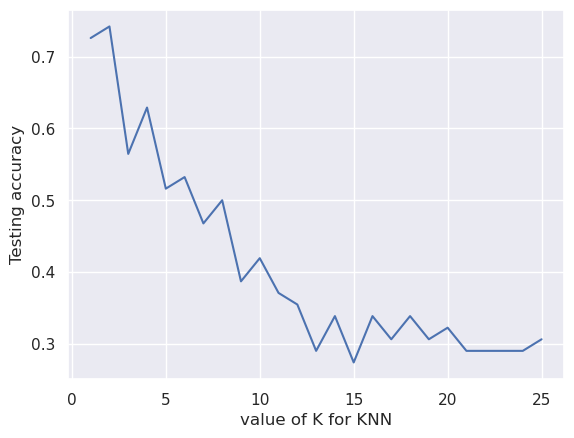

In [102]:
plt.plot(k_range, scores_list)
plt.xlabel('value of K for KNN')
plt.ylabel('Testing accuracy')

In [103]:
knn = KNeighborsClassifier(n_neighbors = 2)


scores = cross_val_score(knn, x_train_res, y_train_res, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.07


In [104]:
knn.fit(x_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=2)

In [105]:
knn_pred = knn.predict(x_test)

In [106]:
confusion_matrix(y_test, knn_pred)

array([[42,  9],
       [ 7,  4]])

In [107]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, knn_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, knn_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, knn_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, knn_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, knn_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, knn_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, knn_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, knn_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, knn_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, knn_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, knn_pred, target_names=['Alive', 'Dead']))



Accuracy: 0.7419

Micro Precision: 0.74
Micro Recall: 0.74
Micro F1-score: 0.74

Macro Precision: 0.58
Macro Recall: 0.59
Macro F1-score: 0.59

Weighted Precision: 0.76
Weighted Recall: 0.74
Weighted F1-score: 0.75

Classification Report

              precision    recall  f1-score   support

       Alive       0.86      0.82      0.84        51
        Dead       0.31      0.36      0.33        11

    accuracy                           0.74        62
   macro avg       0.58      0.59      0.59        62
weighted avg       0.76      0.74      0.75        62



This model gives an accuracy slightly worse than the Random Forest Classifier. However, the F1-score of KNN Classifier is the best so far. The model also performs slightly better in predicting the negative class as compared to the other models. 

# Conclusion

The different classification models tried are Logistic Regression, Naive bayes, SVM, Random Forest and K-Nearest Neighbours. 

Logistic regression gave the overall worst performance scores. Naive Bayes classifer  gave slightly better performance. It must be noted that Naive Bayes performed the best for negative with recall around 55%. However, the weighted F1-score is 53%. SVM had the best cross-validation accuracy (92%) and the least standard deviation (0.03), but it did a very bad job in predicting the negative class. Random Forest classifier performed similarly with slightly better performance in predicting positive class. The weighted F1-score was around 73%. Finally, KNN classifier with k=2 gave the overall best performance. Though its negative class performance metrics are not the best, it gave the best overall trade-off. Its overall accuracy is 74.19% and weighted F1-score is 75%.

It can be said that no single model performed the best. This can be because of the highly imbalanced dataset and the constraint on the number of samples. Dropping samples reduced the size of the dataset even more. 